In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets

In [2]:
# df = pd.read_csv("data/swissbanknotes.txt", sep=' ', index_col='key')
# df
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
X0 = X
print(X0[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


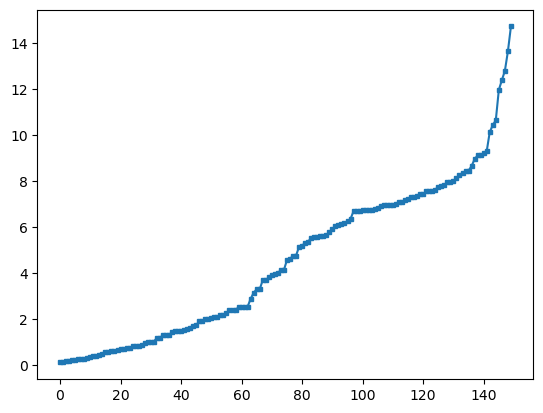

[5.84333333 3.05733333 3.758      1.19933333]


In [4]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3)
plt.show()
print(c0)

In [5]:
N = len(X0)
alpha = (N - 8) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
c = pca.find_rob_center(X0, wma)
print(c)

0.9466666666666667
[5.82535738 3.07528481 3.74105151 1.21354908]


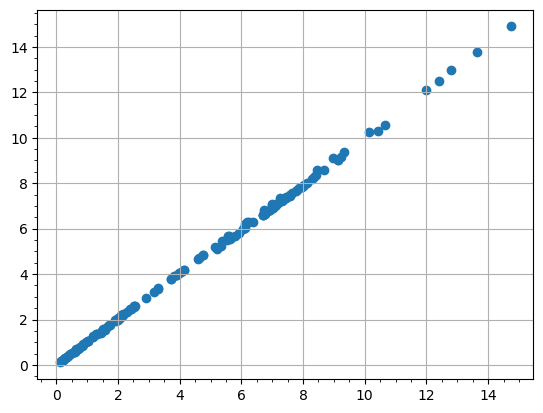

In [6]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [7]:
X1 = X0 - c

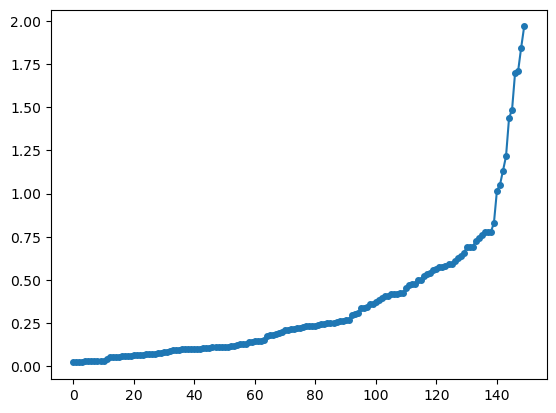

630.0536437988924 [ 0.36143575 -0.08459276  0.856679    0.35820296]


In [8]:
a1_0, L1_0 = pca.find_pc(X1)
plt.plot(sorted(pca.distance_line(X1, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

0.9266666666666666


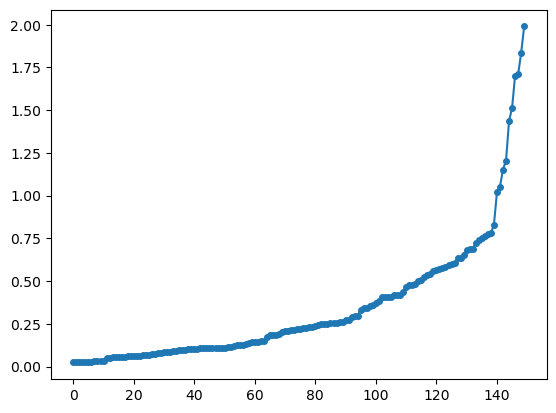

4.049012055923177 [ 0.36336624 -0.08832757  0.85353616  0.36282121]


In [9]:
N = len(X0)
alpha = (N - 11) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X0, a1)
U1_0 = pca.project_line(X0, a1_0)

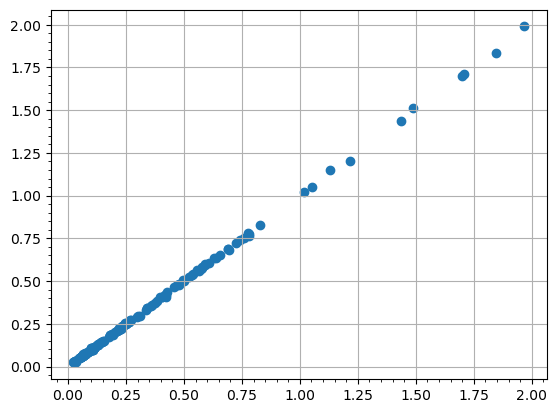

In [10]:
plt.scatter(pca.distance_line(X1, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [11]:
X2 = pca.project(X1, a1)

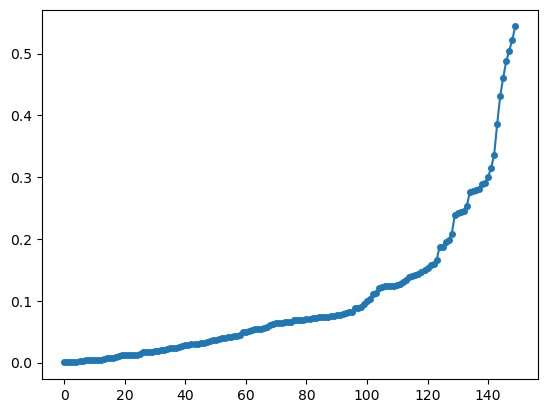

36.16040445485166 [ 0.65670206  0.73040995 -0.17221112 -0.07474646]


In [12]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.92


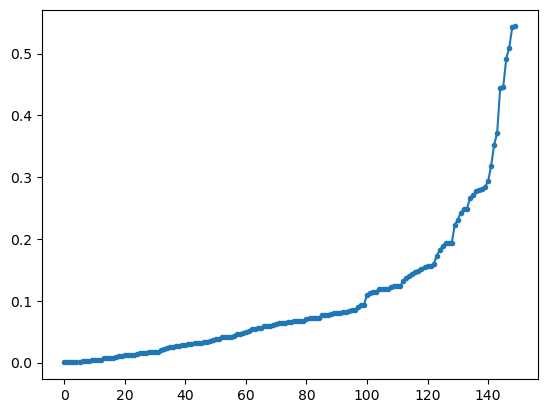

0.24580551879199344 [ 0.67362781  0.71252272 -0.17659602 -0.08573675]


In [13]:
N = len(X0)
alpha = (N - 12) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X0, a2)
U2_0 = pca.project_line(X0, a2_0)

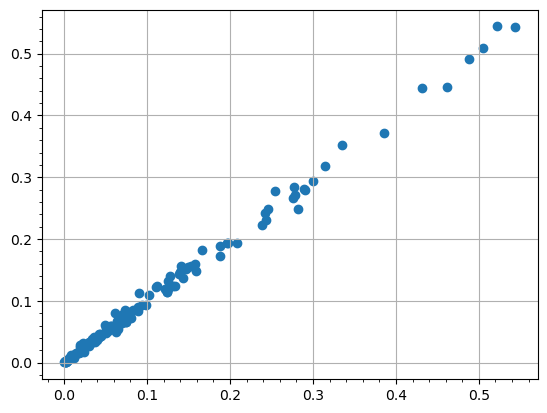

In [14]:
plt.scatter(pca.distance_line(X2, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

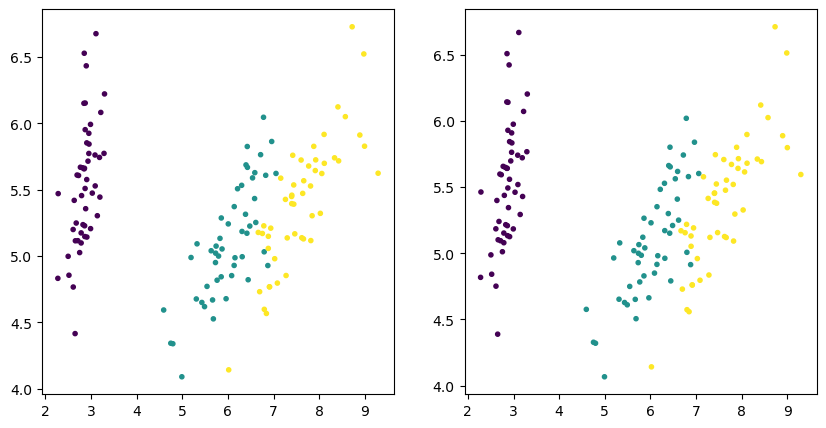

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, s=9, c=Y)
plt.subplot(1,2,2)
plt.scatter(U1_0, U2_0, s=9,c=Y)
plt.show()

In [16]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [17]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.88)
S = robust_scatter_matrix(X1, wma)
print(S)

[[ 2.30870541 -1.33762206 -1.5161651   1.15186595]
 [-1.33762206  1.97171718  1.53080714 -1.66860347]
 [-1.5161651   1.53080714  2.60510727 -4.01245025]
 [ 1.15186595 -1.66860347 -4.01245025  7.55942231]]


In [18]:
L, A = np.linalg.eig(S)
print(A)

[[ 0.23491673 -0.72316324  0.57875713 -0.29476979]
 [-0.2682904   0.49985261  0.80976881  0.14980686]
 [-0.48149504  0.13078232 -0.08062469 -0.86287784]
 [ 0.80062283  0.45834296  0.05305004 -0.38224404]]
